### exercise 7: tree based methods 

### task 1: classification trees 

In [1]:
import numpy as np
import pandas as pd
import graphviz

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.display import Image, display
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Carseats.csv', index_col=0)
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'])
df = df.drop(['ShelveLoc_Bad', 'Urban_No', 'US_No'],axis=1)

In [3]:
df['High'] = df.Sales > 8
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,High
1,9.50,138,73,11,276,120,42,17,0,0,1,1,True
2,11.22,111,48,16,260,83,65,10,1,0,1,1,True
3,10.06,113,35,10,269,80,59,12,0,1,1,1,True


In [4]:
clf = tree.DecisionTreeClassifier(min_samples_split=20)

predictors = df.columns.tolist()
predictors.remove('Sales')
predictors.remove('High')
X = df[predictors].values

y = df.High.values.reshape(-1,1)

tree_est = clf.fit(X, y)

#tree.plot_tree(tree_est)

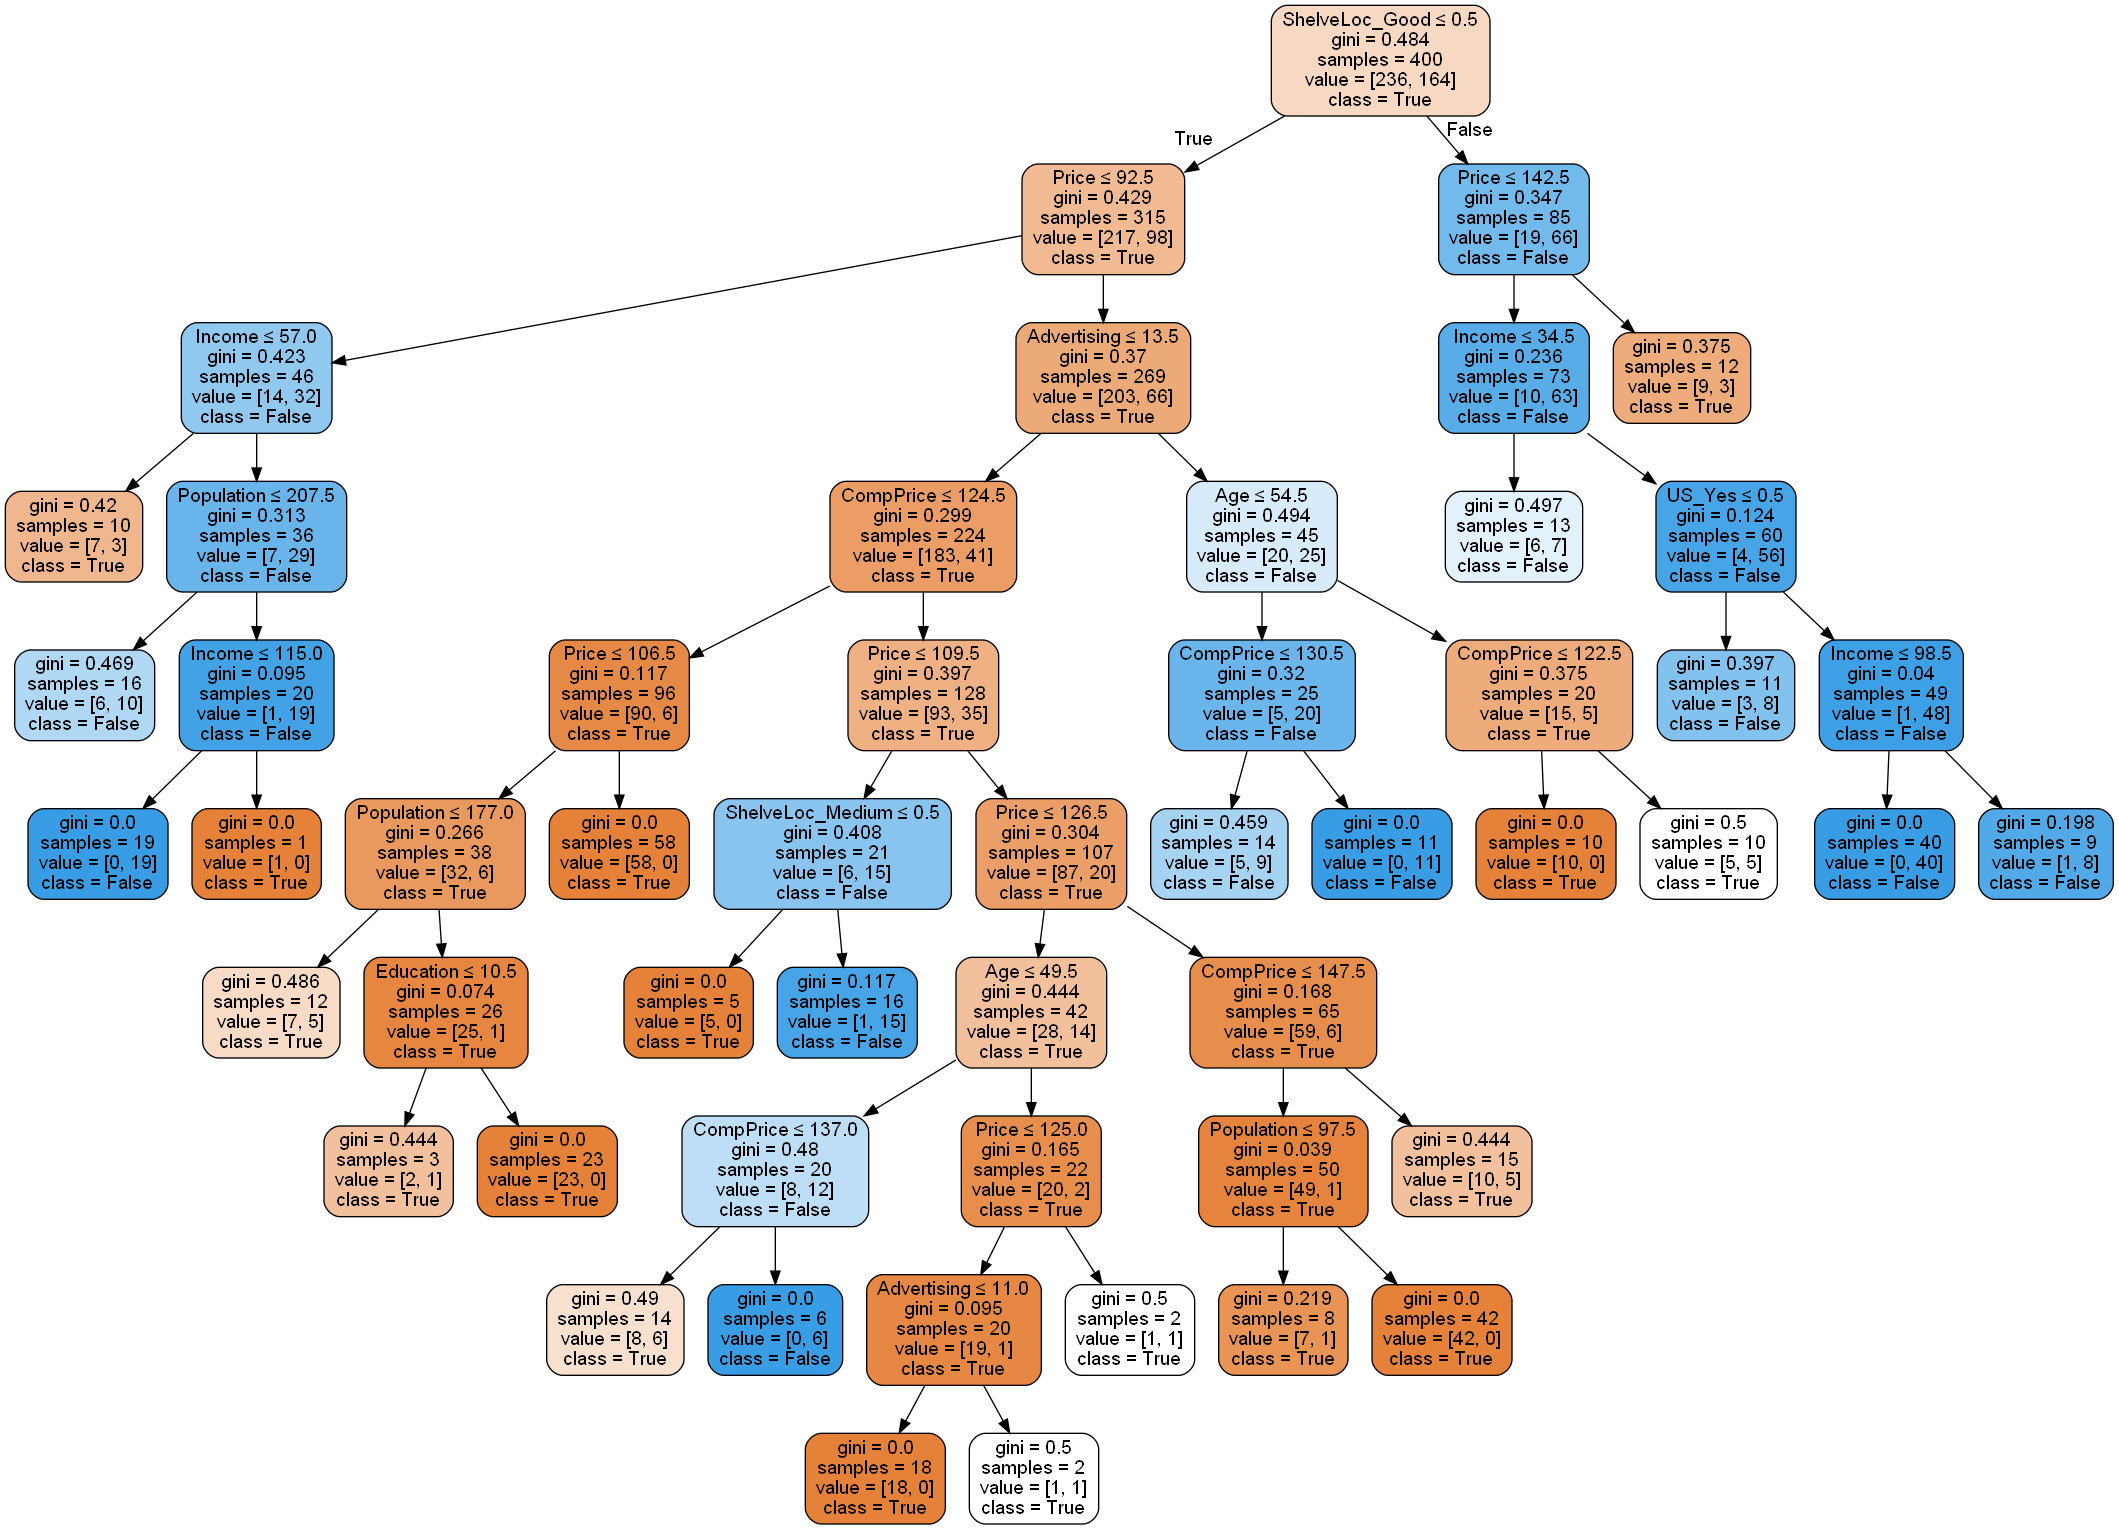

In [5]:
dot_data = tree.export_graphviz(tree_est, out_file='seat_tree.dot',feature_names=predictors, 
                class_names=['True', 'False'],filled=True, rounded=True,  
                        special_characters=True)

with open('seat_tree.dot') as f:
    dot_graph = f.read()  

I = graphviz.Source(dot_graph, format='png', engine='dot')

Image(I.render())

In [6]:
I.view()

'Source.gv.png'

In [7]:
feature_importances = tree_est.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], 
                                                                                                ascending=False)

,Importance
Price,0.301531
ShelveLoc_Good,0.228331
CompPrice,0.109957
Age,0.095710
Advertising,0.088996
Income,0.074141
ShelveLoc_Medium,0.052739
Population,0.034942
US_Yes,0.009009
Education,0.004645


In [8]:
cmatrix = confusion_matrix(y_true = y, y_pred=tree_est.predict(X), labels=[True, False])
print(cmatrix)

[[133  31]
 [ 22 214]]


In [9]:
error_rate = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Training Error Rate:", error_rate)

Training Error Rate: 0.1325


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

tree_est = clf.fit(X_train, y_train)
 
ypred = tree_est.predict(X_test)

cmatrix_test = confusion_matrix(y_true = y_test, y_pred=ypred, labels=[True, False])
error_rate = (cmatrix_test[0,1]+cmatrix_test[1,0])/cmatrix_test.sum()
print("Test Error Rate:", error_rate)

Test Error Rate: 0.3333333333333333
